In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Load preprocessed data from other notebook

In [2]:
train_set = pd.read_csv('/kaggle/input/course-project-data-pre/train_set.csv')
train_set

,segment_id,sensor_1_sum,sensor_1_mean,sensor_1_min,sensor_1_max,sensor_1_kurtosis,sensor_1_var,sensor_1_mad,sensor_1_skew,sensor_1_q99,...,sensor_10_q05,sensor_10_q10,sensor_10_q90,sensor_10_q85,sensor_10_q15,sensor_10_q80,sensor_10_q20,sensor_10_q60,sensor_10_q40,time_to_eruption
0,1136037770,-96621.0,-1.610323,-1421.0,1353.0,0.247736,91867.245099,238.836278,-0.057494,704.0,...,-966.0,-757.0,767.0,617.0,-616.0,507.0,-503.0,159.0,-151.0,12262005
1,1969647810,85569.0,1.426126,-2005.0,2197.0,1.177624,192159.980413,334.894305,-0.001189,1108.0,...,-1448.0,-1091.0,1146.0,892.0,-864.0,710.0,-692.0,205.0,-202.0,32739612
2,1895879680,150278.0,2.504592,-1115.0,1148.0,0.567813,58358.681050,189.198970,0.071632,613.0,...,-806.0,-618.0,624.0,498.0,-497.0,403.0,-402.0,120.0,-121.0,14965999
3,2068207140,129950.0,2.165797,-1025.0,1254.0,1.079660,49269.715377,171.285870,0.123639,556.0,...,-828.0,-625.0,652.0,510.0,-499.0,407.0,-400.0,122.0,-121.0,26469720
4,192955606,4429.0,0.073815,-1190.0,1114.0,0.274037,68484.762635,205.913478,0.006594,636.0,...,-934.0,-715.0,698.0,557.0,-568.0,449.0,-458.0,134.0,-134.0,31072429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,873340274,54405.0,0.906735,-2610.0,2916.0,0.168746,376293.054135,487.948374,-0.003413,1433.0,...,-1749.0,-1338.0,1305.0,1041.0,-1047.0,838.0,-839.0,240.0,-249.0,15695097
4427,1297437712,476221.0,7.936884,-3654.0,4498.0,0.695682,421317.332733,508.895214,0.113867,1565.0,...,-1941.0,-1480.0,1536.0,1219.0,-1202.0,984.0,-976.0,294.0,-298.0,35659379
4428,694853998,85261.0,1.420993,-753.0,557.0,1.005580,12308.259562,86.101013,-0.060527,270.0,...,-393.0,-293.0,291.0,230.0,-232.0,184.0,-187.0,56.0,-56.0,31206935
4429,1886987043,54350.0,0.905818,-3555.0,3938.0,2.278329,229299.794013,359.875923,0.028062,1237.0,...,-989.0,-749.0,731.0,579.0,-592.0,458.0,-471.0,101.0,-106.0,9598270


Drop indexes and create labels

In [3]:
train_features = train_set.drop(['segment_id', 'time_to_eruption'], axis=1)
train_labels = train_set['time_to_eruption']
train_features

,sensor_1_sum,sensor_1_mean,sensor_1_min,sensor_1_max,sensor_1_kurtosis,sensor_1_var,sensor_1_mad,sensor_1_skew,sensor_1_q99,sensor_1_q01,...,sensor_10_q95,sensor_10_q05,sensor_10_q10,sensor_10_q90,sensor_10_q85,sensor_10_q15,sensor_10_q80,sensor_10_q20,sensor_10_q60,sensor_10_q40
0,-96621.0,-1.610323,-1421.0,1353.0,0.247736,91867.245099,238.836278,-0.057494,704.0,-735.0,...,992.0,-966.0,-757.0,767.0,617.0,-616.0,507.0,-503.0,159.0,-151.0
1,85569.0,1.426126,-2005.0,2197.0,1.177624,192159.980413,334.894305,-0.001189,1108.0,-1128.0,...,1549.0,-1448.0,-1091.0,1146.0,892.0,-864.0,710.0,-692.0,205.0,-202.0
2,150278.0,2.504592,-1115.0,1148.0,0.567813,58358.681050,189.198970,0.071632,613.0,-575.0,...,822.0,-806.0,-618.0,624.0,498.0,-497.0,403.0,-402.0,120.0,-121.0
3,129950.0,2.165797,-1025.0,1254.0,1.079660,49269.715377,171.285870,0.123639,556.0,-534.0,...,869.0,-828.0,-625.0,652.0,510.0,-499.0,407.0,-400.0,122.0,-121.0
4,4429.0,0.073815,-1190.0,1114.0,0.274037,68484.762635,205.913478,0.006594,636.0,-627.0,...,915.0,-934.0,-715.0,698.0,557.0,-568.0,449.0,-458.0,134.0,-134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,54405.0,0.906735,-2610.0,2916.0,0.168746,376293.054135,487.948374,-0.003413,1433.0,-1458.0,...,1738.0,-1749.0,-1338.0,1305.0,1041.0,-1047.0,838.0,-839.0,240.0,-249.0
4427,476221.0,7.936884,-3654.0,4498.0,0.695682,421317.332733,508.895214,0.113867,1565.0,-1514.0,...,2040.0,-1941.0,-1480.0,1536.0,1219.0,-1202.0,984.0,-976.0,294.0,-298.0
4428,85261.0,1.420993,-753.0,557.0,1.005580,12308.259562,86.101013,-0.060527,270.0,-268.0,...,389.0,-393.0,-293.0,291.0,230.0,-232.0,184.0,-187.0,56.0,-56.0
4429,54350.0,0.905818,-3555.0,3938.0,2.278329,229299.794013,359.875923,0.028062,1237.0,-1225.0,...,971.0,-989.0,-749.0,731.0,579.0,-592.0,458.0,-471.0,101.0,-106.0


Standardized the new data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features[:] = scaler.fit_transform(train_features)
train_features = train_features.fillna(0)
train_features

,sensor_1_sum,sensor_1_mean,sensor_1_min,sensor_1_max,sensor_1_kurtosis,sensor_1_var,sensor_1_mad,sensor_1_skew,sensor_1_q99,sensor_1_q01,...,sensor_10_q95,sensor_10_q05,sensor_10_q10,sensor_10_q90,sensor_10_q85,sensor_10_q15,sensor_10_q80,sensor_10_q20,sensor_10_q60,sensor_10_q40
0,-0.060558,-0.060558,0.357337,-0.374083,-0.261333,-0.124710,-0.218926,-0.792653,-0.250729,0.241927,...,-0.233867,0.241826,0.221356,-0.217406,-0.211590,0.211826,-0.205137,0.207427,-0.184650,0.202060
1,0.108988,0.108988,0.236445,-0.201596,-0.133453,-0.119957,-0.139381,-0.110276,-0.134997,0.129221,...,-0.049398,0.083089,0.085436,-0.062959,-0.074288,0.088203,-0.079460,0.090550,-0.089104,0.095590
2,0.169206,0.169206,0.420682,-0.415979,-0.217315,-0.126297,-0.260031,0.772254,-0.276798,0.287813,...,-0.290168,0.294519,0.277921,-0.275680,-0.271004,0.271145,-0.269524,0.269885,-0.265657,0.264689
3,0.150288,0.150288,0.439312,-0.394316,-0.146925,-0.126728,-0.274865,1.402531,-0.293126,0.299571,...,-0.274603,0.287273,0.275072,-0.264270,-0.265013,0.270148,-0.267047,0.271122,-0.261503,0.264689
4,0.033479,0.033479,0.405156,-0.422927,-0.257716,-0.125818,-0.246190,-0.015955,-0.270209,0.272900,...,-0.259368,0.252364,0.238447,-0.245524,-0.241547,0.235753,-0.241045,0.235255,-0.236578,0.237550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.079986,0.079986,0.111205,-0.054654,-0.272196,-0.111231,-0.012637,-0.137228,-0.041895,0.034582,...,0.013195,-0.016040,-0.015079,0.001835,0.000104,-0.003018,-0.000215,-0.000354,-0.016406,-0.002529
4427,0.472528,0.472528,-0.104911,0.268658,-0.199730,-0.109098,0.004709,1.284106,-0.004082,0.018522,...,0.113212,-0.079271,-0.072866,0.095970,0.088976,-0.080282,0.090173,-0.085075,0.095757,-0.104823
4428,0.108701,0.108701,0.495619,-0.536761,-0.157113,-0.128480,-0.345406,-0.829401,-0.375056,0.375855,...,-0.433571,0.430532,0.410178,-0.411381,-0.404811,0.403241,-0.405107,0.402840,-0.398591,0.400385
4429,0.079935,0.079935,-0.084417,0.154211,0.017918,-0.118197,-0.118693,0.244215,-0.098043,0.101403,...,-0.240822,0.234251,0.224611,-0.232076,-0.230563,0.223789,-0.235473,0.227215,-0.305122,0.296003


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader, random_split
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import train_test_split

Create 80/20 train/test split

In [6]:
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, random_state=666, test_size=0.2, shuffle=False)

Custom Dataset and Dataloader for the Volcano Data

In [7]:

class VolcanoDataset(Dataset):
    def __init__(self, train_features, train_labels):
        super().__init__()
        self.train_features = train_features
        self.train_labels = train_labels

    def __len__(self):
        return len(self.train_features)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return (self.train_features[idx], self.train_labels[idx])

Two multilayer perceptrons 
First one is used for the submission

In [8]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super().__init__()
        self.regressor = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, xb):
        xb = self.regressor(xb)
        return xb

In [ ]:
class MLP2(nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super().__init__()
        self.regressor = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(128, 16),
            nn.Dropout(0.15),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, xb):
        xb = self.regressor(xb)
        return xb

Created RMSELoss

In [9]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))


Created the model, defined the RMSE criterion, and Adam optimizer

In [10]:
net = MLP(train_features.shape[1])
criterion = RMSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

In [11]:
train_dataset = VolcanoDataset(train_features.values.astype(float), train_labels.values.astype(float).reshape((-1, 1)))
train_loader = DataLoader(train_dataset, 32, shuffle=False)
val_dataset = VolcanoDataset(val_features.values.astype(float), val_labels.values.astype(float).reshape((-1, 1)))
val_loader = DataLoader(val_dataset, 1000, shuffle=False)


Train the model

In [12]:
epochs = 250
train_loss  = []
val_loss = []
for epoch in range(epochs):
    net.train()
    batch_loss  = []
    for data in train_loader:
        X, y = data
        # ===================forward=====================
        y_hat = net(X.float())
        loss = criterion(y_hat, y.float())
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # ===================log========================
        batch_loss.append(loss.item())
    train_loss.append(np.mean(batch_loss))
    
    
    net.eval()
    batch_loss  = []
    with torch.no_grad():
      for X, y in val_loader:
          y_hat = net(X.float())
          loss = criterion(y_hat, y.float())
          batch_loss.append(loss.item())
    val_loss.append(np.mean(batch_loss))
    print('epoch [{}/{}], train loss:{:.4f}, val loss:{:.4f}'
          .format(epoch + 1, epochs, train_loss[-1], val_loss[-1]))

epoch [1/250], train loss:17892304.5045, val loss:14257912.0000
epoch [2/250], train loss:13601147.7207, val loss:12301194.0000
epoch [3/250], train loss:12762146.8108, val loss:12320689.0000
epoch [4/250], train loss:12488748.0811, val loss:11942778.0000
epoch [5/250], train loss:12268960.5586, val loss:11764556.0000
epoch [6/250], train loss:12106832.2027, val loss:11723414.0000
epoch [7/250], train loss:12087285.3514, val loss:11935142.0000
epoch [8/250], train loss:12114732.0541, val loss:11490105.0000
epoch [9/250], train loss:11926354.8378, val loss:11813294.0000
epoch [10/250], train loss:12102869.0135, val loss:11771773.0000
epoch [11/250], train loss:12144042.2342, val loss:12295086.0000
epoch [12/250], train loss:11933514.1802, val loss:11637336.0000
epoch [13/250], train loss:11857226.4955, val loss:11479321.0000
epoch [14/250], train loss:11837268.4414, val loss:11240317.0000
epoch [15/250], train loss:11645234.4955, val loss:11858739.0000
epoch [16/250], train loss:1165787

epoch [129/250], train loss:8729986.6171, val loss:8687730.0000
epoch [130/250], train loss:8867011.3559, val loss:8622624.0000
epoch [131/250], train loss:8864369.2838, val loss:8295573.0000
epoch [132/250], train loss:8746621.9865, val loss:8746217.0000
epoch [133/250], train loss:8656567.4505, val loss:8275844.0000
epoch [134/250], train loss:8603278.6261, val loss:8603670.0000
epoch [135/250], train loss:8636696.6351, val loss:8505694.0000
epoch [136/250], train loss:8851404.5090, val loss:8324875.5000
epoch [137/250], train loss:8713758.4054, val loss:8425880.0000
epoch [138/250], train loss:8590098.9189, val loss:8738203.0000
epoch [139/250], train loss:8832625.5766, val loss:8580658.0000
epoch [140/250], train loss:8750255.6937, val loss:8219715.0000
epoch [141/250], train loss:8663715.2162, val loss:8616406.0000
epoch [142/250], train loss:8575235.5946, val loss:8381523.5000
epoch [143/250], train loss:8559205.9865, val loss:8658056.0000
epoch [144/250], train loss:8583035.3333

Ploting the train/ val loss

In [13]:
from matplotlib import pyplot as plt
from IPython import display

def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    """Plot x and log(y)."""

    def set_figsize(figsize=(3.5, 2.5)):
        """Set matplotlib figure size."""
        display.set_matplotlib_formats('svg')
        plt.rcParams['figure.figsize'] = figsize

    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()

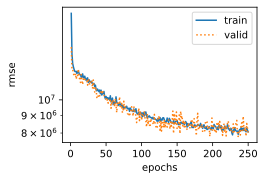

In [14]:
semilogy(range(1, epochs + 1), train_loss, 'epochs', 'rmse',
                        range(1, epochs + 1), val_loss,
                        ['train', 'valid'])

LGBM regressor for one of the baselines

In [15]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100)

In [16]:
gbm.fit(train_features, train_labels)

LGBMRegressor()

This is a simple linear model from Scikit Learn that provides a baseline for the other models

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
reg = LinearRegression()
reg.fit(train_features.values.astype(float), train_labels.values.astype(float).reshape((-1, 1)))

LinearRegression()

Read in the preprocessed test data from the other notebook

In [18]:
test = pd.read_csv("/kaggle/input/predict-volcanic-eruptions-ingv-oe/sample_submission.csv")

In [19]:
test_set = pd.read_csv('/kaggle/input/course-project-data-pre/test_set.csv')

In [20]:
test_features = test_set.drop(['segment_id', 'time_to_eruption'], axis=1)
test_features

,sensor_1_sum,sensor_1_mean,sensor_1_min,sensor_1_max,sensor_1_kurtosis,sensor_1_var,sensor_1_mad,sensor_1_skew,sensor_1_q99,sensor_1_q01,...,sensor_10_q95,sensor_10_q05,sensor_10_q10,sensor_10_q90,sensor_10_q85,sensor_10_q15,sensor_10_q80,sensor_10_q20,sensor_10_q60,sensor_10_q40
0,267753.0,4.462476,-1319.0,1347.0,0.441816,9.374281e+04,239.780746,0.018572,758.0,-726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50287.0,0.838103,-1268.0,1214.0,-0.097694,1.126214e+05,269.067715,-0.011491,768.0,-773.0,...,927.0,-932.0,-725.0,718.0,579.0,-589.0,469.0,-482.0,139.0,-145.0
2,47695.0,0.794903,-3806.0,4259.0,6.125681,1.240253e+05,254.199613,-0.050056,927.0,-921.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,117225.0,1.953717,-1156.0,1220.0,0.083266,6.709660e+04,206.508129,0.014705,609.0,-605.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-239079.0,-3.984584,-1111.0,972.0,0.058601,6.467176e+04,201.760901,-0.077960,577.0,-618.0,...,865.0,-862.0,-669.0,670.0,536.0,-540.0,434.0,-437.0,130.0,-130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-8140616.0,-135.674672,-32767.0,32767.0,-1.822876,8.694385e+08,28082.080125,0.000677,32767.0,-32767.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4516,-159989.0,-2.666439,-1291.0,1032.0,0.060913,8.658957e+04,234.237444,-0.046301,676.0,-702.0,...,890.0,-873.0,-678.0,685.0,556.0,-546.0,448.0,-441.0,134.0,-132.0
4517,71538.0,1.192280,-3032.0,2641.0,1.870325,1.376950e+05,282.775171,0.058241,919.0,-916.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,193117.0,3.218563,-1423.0,1494.0,0.421511,1.201711e+05,270.839266,0.084854,875.0,-827.0,...,1338.0,-1283.0,-980.0,1017.0,813.0,-781.0,659.0,-636.0,194.0,-192.0


In [21]:
scaler = StandardScaler()
test_features[:] = scaler.fit_transform(test_features)
test_features = test_features.fillna(0)
test_features

,sensor_1_sum,sensor_1_mean,sensor_1_min,sensor_1_max,sensor_1_kurtosis,sensor_1_var,sensor_1_mad,sensor_1_skew,sensor_1_q99,sensor_1_q01,...,sensor_10_q95,sensor_10_q05,sensor_10_q10,sensor_10_q90,sensor_10_q85,sensor_10_q15,sensor_10_q80,sensor_10_q20,sensor_10_q60,sensor_10_q40
0,0.097879,0.097879,0.310289,-0.309664,-0.184464,-0.102956,-0.161811,0.118539,-0.194434,0.203614,...,-0.442378,0.449091,0.434332,-0.423833,-0.421184,0.423014,-0.409940,0.411991,-0.384070,0.388288
1,0.003543,0.003543,0.320373,-0.335963,-0.243305,-0.102444,-0.143230,-0.141642,-0.191633,0.190448,...,-0.080120,0.079577,0.068400,-0.073025,-0.068140,0.061860,-0.065703,0.056029,-0.064027,0.050113
2,0.002418,0.002418,-0.181452,0.266130,0.435435,-0.102135,-0.152663,-0.475398,-0.147107,0.148989,...,-0.442378,0.449091,0.434332,-0.423833,-0.421184,0.423014,-0.409940,0.411991,-0.384070,0.388288
3,0.032580,0.032580,0.342519,-0.334776,-0.223569,-0.103678,-0.182922,0.085078,-0.236160,0.237509,...,-0.442378,0.449091,0.434332,-0.423833,-0.421184,0.423014,-0.409940,0.411991,-0.384070,0.388288
4,-0.121984,-0.121984,0.351416,-0.383814,-0.226259,-0.103744,-0.185934,-0.716893,-0.245121,0.233867,...,-0.104348,0.107330,0.096665,-0.096477,-0.094359,0.091905,-0.091393,0.089262,-0.084749,0.085097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-3.549669,-3.549669,-5.907755,5.903060,-0.431458,23.459038,17.503260,-0.036333,8.769392,-8.771844,...,-0.442378,0.449091,0.434332,-0.423833,-0.421184,0.423014,-0.409940,0.411991,-0.384070,0.388288
4516,-0.087675,-0.087675,0.315826,-0.371950,-0.226007,-0.103150,-0.165328,-0.442902,-0.217397,0.210337,...,-0.094579,0.102969,0.092123,-0.089148,-0.082164,0.088226,-0.081117,0.086308,-0.075539,0.080432
4517,0.012761,0.012761,-0.028413,-0.053800,-0.028667,-0.101765,-0.134533,0.461854,-0.149347,0.150390,...,-0.442378,0.449091,0.434332,-0.423833,-0.421184,0.423014,-0.409940,0.411991,-0.384070,0.388288
4518,0.065502,0.065502,0.289726,-0.280598,-0.186679,-0.102240,-0.142106,0.692176,-0.161669,0.175321,...,0.080493,-0.059586,-0.060307,0.073064,0.074541,-0.055867,0.073753,-0.057702,0.062609,-0.059502


Prediction for the LGBMregressor

In [37]:
preds = gbm.predict(test_features)

array([23651546.34676116, 37471777.48146439, 28114520.75752883, ...,
       20723998.16153741, 29508948.05060688, 28755283.71630139])

Predictions for the Sklearn linear Regression model

In [ ]:
preds = reg.predict(test_features)

Predictions for the MLP

In [68]:
test_features = test_features.values.astype(float)
preds = net(torch.from_numpy(test_features).float()).data.numpy()
preds

array([[13282790.],
       [20614098.],
       [30646218.],
       ...,
       [20214450.],
       [23329124.],
       [19471702.]], dtype=float32)

Writes the prediction in a csv for submission

In [69]:
test['time_to_eruption'] = pd.Series(preds.reshape(1, -1)[0])
submission = pd.concat([test['segment_id'], test['time_to_eruption']], axis=1)
submission.to_csv('submission.csv', index=False)

In [70]:
submission

,segment_id,time_to_eruption
0,1000213997,13282790.0
1,100023368,20614098.0
2,1000488999,30646218.0
3,1001028887,11779958.0
4,1001857862,14020498.0
...,...,...
4515,996704281,55075060.0
4516,997630809,16827126.0
4517,998072137,20214450.0
4518,998136924,23329124.0
